In [26]:
import pandas as pd

In [27]:
df= pd.read_csv("IMDB Dataset.csv")
df=df[:100]

In [28]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [29]:
df['sentiment'].value_counts()

sentiment
negative    58
positive    42
Name: count, dtype: int64

In [30]:
import seaborn as sns

<Axes: xlabel='sentiment', ylabel='count'>

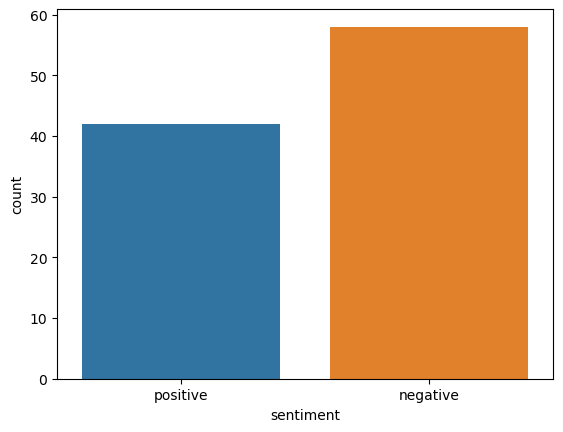

In [31]:
sns.countplot(x="sentiment",data=df)

In [32]:
positive_review = list(df[df['sentiment']=='positive']['review'])
negative_review = list(df[df['sentiment']=='negative']['review'])

In [33]:
positive_review

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

In [34]:
from wordcloud import WordCloud,STOPWORDS
from matplotlib import pyplot as plt 


In [35]:
def create_cloud (string,title= None):
    cloud= WordCloud(height=1080,width=1920,background_color='white', min_font_size=10,stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(10,20))
    plt.imshow(cloud,interpolation="bilinear")
    plt.axis("off")
    if title:
        plt.title(title,fontdict={'fontsize':24})
    plt.show

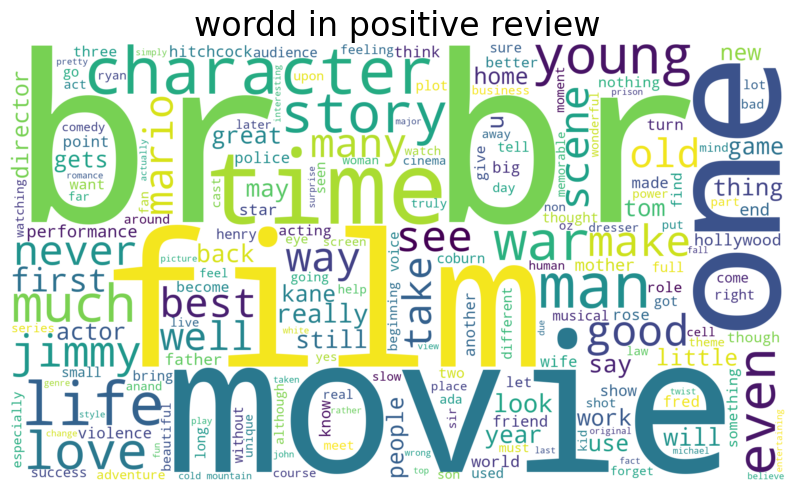

In [36]:
create_cloud(''.join(positive_review).lower(),'wordd in positive review')

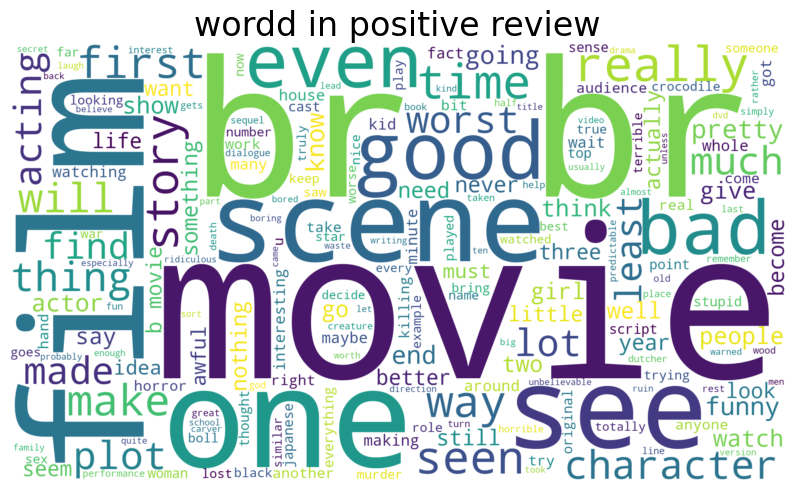

In [37]:
create_cloud(''.join(negative_review).lower(),'wordd in positive review')

In [45]:
def text_processing(data,review):
    digit = '1234567890'
    from bs4 import BeautifulSoup
    import re
    def decontracted(phrase):
        # specific
        phrase= re.sub(r'<br /><br />',' ',phrase)
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r'"', " ", phrase)
        return phrase
    stopwords=set(STOPWORDS)

    # Combining all the above stundents 
    from tqdm import tqdm
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data[review].values):
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        sentance = sentance.lower()
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split() if e not in stopwords )
        preprocessed_reviews.append(sentance.strip())
    
    new_preprocessed_reviews=[]
    for sentennce in preprocessed_reviews:
        for char in sentennce:
            if char in digit:
                sentennce = sentennce.replace(char,'')
        new_preprocessed_reviews.append(sentennce)
        
                
    
    
    from nltk.stem import PorterStemmer

    porter = PorterStemmer()
    list2=[]
    for  sentence in new_preprocessed_reviews:
      list1=[]
      for words in sentence.split():
            list1.append(porter.stem(words))

      list2.append(' '.join(list1))
    return(list2)

In [47]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [48]:
df['cleaned_review']=text_processing(df,"review")

100%|██████████| 100/100 [00:00<00:00, 2052.69it/s]


In [49]:
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod will hooked...
1,A wonderful little production. <br /><br />The...,positive,wonder littl production. film techniqu unassum...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy (jake) think zombi clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [50]:
df_x= df["cleaned_review"]
df_y= df['sentiment']

# Data Spliting

In [ ]:
from sklearn.model_selection import train_test_split

x_train, 